<a href="https://colab.research.google.com/github/monolixd/Ailearn/blob/main/Semantic_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# การแทนความรู้ด้วยเครือข่ายเชิงความหมาย Semantic Network

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
G = nx.DiGraph()

In [10]:
G.add_edge("Dog","Mammal",labe="Is a type of")
G.add_edge("Mammal","Animal", label="Is a type of")
G.add_edge("Dog","Pet",lable="Is")

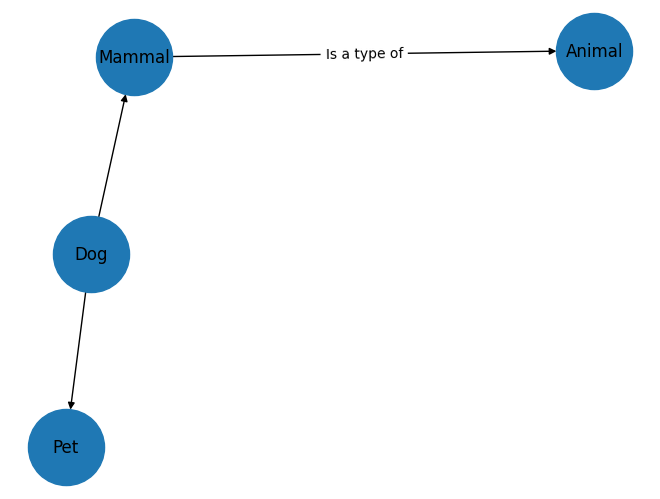

In [12]:
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True, node_size=3000)
edge_labels=nx.get_edge_attributes(G,"label")
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

# ใช้ Logic เชิงประพจน์ในการแก้ปัญหา

In [13]:
from sympy.logic.boolalg import Implies
from sympy import symbols

P = symbols("P") #ฝนตก
Q = symbols("Q") #ถนนเปียก

#การสร้างกฏตรรกะ
rule = Implies(P,Q)

In [14]:
print({rule})

{Implies(P, Q)}


In [15]:
print(rule.subs({P: True, Q: True}))

True


# ระบบผู้เชี่ยวชาญวินิจฉัยโรค(ตัวอย่าง)

In [19]:
def diagnose(symptoms):
    symptoms = [s.strip() for s in symptoms]  # ลบช่องว่างรอบๆ แต่ละอาการ

    if "ไข้" in symptoms and "ไอ" in symptoms:
        return "อาจเป็นไข้หวัด"
    elif "ไข้" in symptoms and "ปวดหัว" in symptoms:
        return "อาจเป็นไข้เลือดออก"
    else:
        return "ไม่สามารถวินิจฉัยได้"

# รับข้อมูลจากผู้ใช้
symptoms = input("กรุณาป้อนอาการที่คุณมี (เช่น ไข้, ไอ, ปวดหัว): ").split(",")
symptoms = [s.strip() for s in symptoms]  # ลบช่องว่างรอบๆ ข้อมูลที่ป้อนเข้ามา

result = diagnose(symptoms)
print(f"ผลการวินิจฉัย: {result}")

กรุณาป้อนอาการที่คุณมี (เช่น ไข้, ไอ, ปวดหัว): ไข้,ไอ
ผลการวินิจฉัย: อาจเป็นไข้หวัด


# งานข้อ 1

# ระบบแนะนำสัตว์เลี้ยง

In [20]:
!apt-get install graphviz
!pip install graphviz
import graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


## สร้าง Semantic Network ของสัตว์เลี้ยง

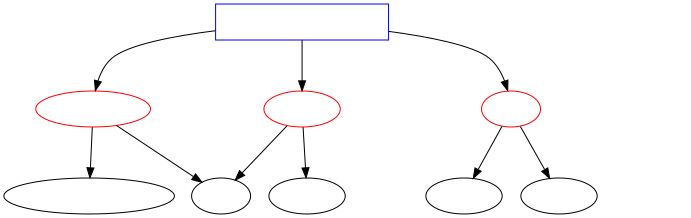

In [21]:
# นำเข้าไลบรารี
from graphviz import Digraph

# สร้างเครือข่ายเชิงความหมาย
net = Digraph("Pet_Semantic_Network")

# เพิ่มโหนด (สัตว์เลี้ยงแต่ละชนิด)
net.node("สัตว์เลี้ยง", shape="box", color="blue")
net.node("สุนัข", shape="ellipse", color="red")
net.node("แมว", shape="ellipse", color="red")
net.node("นก", shape="ellipse", color="red")

# เพิ่มความสัมพันธ์ (Edges)
net.edge("สัตว์เลี้ยง", "สุนัข", label="เป็นประเภทของ")
net.edge("สัตว์เลี้ยง", "แมว", label="เป็นประเภทของ")
net.edge("สัตว์เลี้ยง", "นก", label="เป็นประเภทของ")

# คุณลักษณะของสัตว์
net.edge("สุนัข", "ขน", label="มี")
net.edge("แมว", "ขน", label="มี")
net.edge("นก", "ปีก", label="มี")

# พฤติกรรมของสัตว์
net.edge("สุนัข", "วิ่งเล่น", label="ชอบ")
net.edge("แมว", "ปีน", label="ชอบ")
net.edge("นก", "บิน", label="สามารถ")

# แสดงเครือข่าย
net


## เครือข่ายสำหรับแนะนำสัตว์เลี้ยง

In [22]:
# ฟังก์ชันแนะนำสัตว์เลี้ยง
def recommend_pet(preference):
    if preference == "ขน":
        return "แนะนำให้เลี้ยง สุนัข หรือ แมว"
    elif preference == "ปีก":
        return "แนะนำให้เลี้ยง นก"
    elif preference == "ชอบวิ่งเล่น":
        return "แนะนำให้เลี้ยง สุนัข"
    elif preference == "ชอบปีน":
        return "แนะนำให้เลี้ยง แมว"
    elif preference == "อยากให้บินได้":
        return "แนะนำให้เลี้ยง นก"
    else:
        return "ไม่มีข้อมูลที่ตรงกับความต้องการของคุณ"

# รับอินพุตจากผู้ใช้
user_pref = input("คุณต้องการสัตว์เลี้ยงที่มีคุณสมบัติอะไร? (ขน, ปีก, ชอบวิ่งเล่น, ชอบปีน, อยากให้บินได้): ")
print(recommend_pet(user_pref))

คุณต้องการสัตว์เลี้ยงที่มีคุณสมบัติอะไร? (ขน, ปีก, ชอบวิ่งเล่น, ชอบปีน, อยากให้บินได้): ขน
แนะนำให้เลี้ยง สุนัข หรือ แมว


# งานข้อ 2

In [25]:
!pip install experta
!pip install frozendict==2.3.4

  Attempting uninstall: frozendict
    Found existing installation: frozendict 1.2
    Uninstalling frozendict-1.2:
      Successfully uninstalled frozendict-1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
experta 1.9.4 requires frozendict==1.2, but you have frozendict 2.3.4 which is incompatible.


## สร้างโครงสร้างระบบผู้เชี่ยวชาญ

In [26]:
from experta import *

# สร้างคลาสสำหรับระบบผู้เชี่ยวชาญ
class ComputerExpert(KnowledgeEngine):

    @Rule(Fact(problem="คอมพิวเตอร์เปิดไม่ติด"))
    def power_issue(self):
        print("🔍 ตรวจสอบปัญหา: คอมพิวเตอร์เปิดไม่ติด")
        print("- ตรวจสอบว่าเสียบปลั๊กหรือยัง")
        print("- ตรวจสอบสายไฟและอะแดปเตอร์")
        print("- ลองเปลี่ยนปลั๊กไฟ")

    @Rule(Fact(problem="อินเทอร์เน็ตใช้งานไม่ได้"))
    def internet_issue(self):
        print("🔍 ตรวจสอบปัญหา: อินเทอร์เน็ตใช้งานไม่ได้")
        print("- รีสตาร์ทเราเตอร์")
        print("- ตรวจสอบการเชื่อมต่อ Wi-Fi")
        print("- ลองใช้สาย LAN")

    @Rule(Fact(problem="คอมพิวเตอร์ทำงานช้า"))
    def slow_computer(self):
        print("🔍 ตรวจสอบปัญหา: คอมพิวเตอร์ทำงานช้า")
        print("- ตรวจสอบจำนวนโปรแกรมที่รันอยู่")
        print("- ล้างไฟล์ขยะและรีสตาร์ทเครื่อง")
        print("- เพิ่ม RAM ถ้าจำเป็น")

    @Rule(Fact(problem="หน้าจอไม่แสดงผล"))
    def no_display(self):
        print("🔍 ตรวจสอบปัญหา: หน้าจอไม่แสดงผล")
        print("- ตรวจสอบว่าสาย HDMI/VGA เชื่อมต่อหรือไม่")
        print("- ลองเปลี่ยนสายสัญญาณ")
        print("- ตรวจสอบการตั้งค่าหน้าจอ")

In [28]:
# สร้างอินสแตนซ์ของระบบ
expert = ComputerExpert()

# เปิดใช้งานระบบ
expert.reset()

# รับปัญหาจากผู้ใช้
problem = input("กรุณาป้อนปัญหาของคุณ (เช่น คอมพิวเตอร์เปิดไม่ติด, อินเทอร์เน็ตใช้งานไม่ได้, คอมพิวเตอร์ทำงานช้า, หน้าจอไม่แสดงผล): ")

# ใส่ข้อเท็จจริงลงในระบบ
expert.declare(Fact(problem=problem))

# ประมวลผล
expert.run()

กรุณาป้อนปัญหาของคุณ (เช่น คอมพิวเตอร์เปิดไม่ติด, อินเทอร์เน็ตใช้งานไม่ได้, คอมพิวเตอร์ทำงานช้า, หน้าจอไม่แสดงผล): คอมพิวเตอร์เปิดไม่ติด
🔍 ตรวจสอบปัญหา: คอมพิวเตอร์เปิดไม่ติด
- ตรวจสอบว่าเสียบปลั๊กหรือยัง
- ตรวจสอบสายไฟและอะแดปเตอร์
- ลองเปลี่ยนปลั๊กไฟ
